# X-ray absorption spectroscopy: plotting separate scans

Import all the required libraries. When using `daxs` for XAS scans, import the `Xas` class.

In [1]:
import matplotlib.pyplot as plt

from daxs.measurements import Xas
from daxs.sources import Hdf5Source
from daxs.utils import resources

Define the counters to process data for XAS.

In [2]:
counters = {
    "x": ".1/measurement/hdh_energy",  # The X-axis, here the incident energy.
    "signal": [
        ".1/measurement/det_dtc_apd"
    ],  # The data counter, here is the APD with dead-time correction.
    "monitor": ".1/measurement/I02",  # The counter used for normalization.
}

Define the scan numbers to plot and make a list to store the measurements.

In [3]:
scans_to_plot = [1, 2, 3, 4, 5, 6]
measurements = []

Loop through the scans and add them to the measurements list. We create a Xas measurement object for each scan. Give first the filename, then the number of scans to include, then the number of scans to exclude (if any), and finally the counters defined above.

In [4]:
hdf5_filename = resources.getfile("CuCO3_Ka_XANES.h5")
for scan in scans_to_plot:
    source = Hdf5Source(hdf5_filename, scan, data_mappings=counters)
    measurement = Xas(source)
    # Optionally normalize the data to the area.
    measurement.normalize(mode="area")
    measurements.append(measurement)

Plot the x, and y data of the measurements defined above.

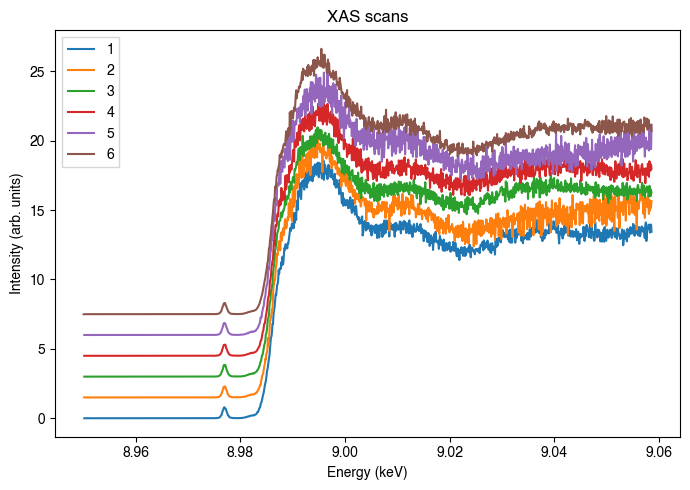

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))

shift = 1.5
for idx, measurement in enumerate(measurements):
    label = f"{scans_to_plot[idx]}"
    # The x and y values to plot. The y values are shifted for better visualization.
    ax.plot(measurement.x, measurement.signal + idx * shift, label=label)

ax.legend()
ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Intensity (arb. units)")
ax.set_title("XAS scans")

plt.tight_layout()
plt.show()